## Jeff Rutledge  Data Science (Part-time DAT-NYC-6.13)
#### Assignment 1: Exploratory Data Analysis

#### Olympic Games Dataset
This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. These data were scraped from www.sports-reference.com in May 2018. 
- Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:
- ID - Row numbers
- Name - Athlete's name
- Sex ( M or F)
- Age (integer)
- Height (centimeters)
- Weight (kilograms)
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year  (integer)
- Season (summer or winter)
- City - Host city
- Sport - Sport
- Event - Event
- Medal (Gold, Silver, Bronze, or NA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
Olympics = pd.read_csv('Projects/Data/athlete_events.csv')

In [3]:
Olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
Olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
Olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


I intend to focus on observations where Olympic medals were awarded.  The "Olympics.info()" command, above, highlights the existence of thousands of records missing information - specifically medals-realeted data.  So we need to drop all "NA"'s from our dataframe.

In [6]:
#Drop "na"'s, other records with missing data
Olympics = Olympics.dropna()

In [7]:
Olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
ID        30181 non-null int64
Name      30181 non-null object
Sex       30181 non-null object
Age       30181 non-null float64
Height    30181 non-null float64
Weight    30181 non-null float64
Team      30181 non-null object
NOC       30181 non-null object
Games     30181 non-null object
Year      30181 non-null int64
Season    30181 non-null object
City      30181 non-null object
Sport     30181 non-null object
Event     30181 non-null object
Medal     30181 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


I will focus on Olympics medal data from 1994-present (USSR was dissolved in 1991; Russia - not the "Unified Team" - first competed as "Russia" in the 1994 Winter Olympics).  I will also focus on summer and winter Olympics individually; and I will only examine USA, China, and Russian results.

In [8]:
Olympics_Total = Olympics = Olympics[(Olympics.Year >= 1994)]
Olympics_Total.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze
67,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,Silver
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold


#### The top-10 Olympics medal-winning countries is shown below.

In [9]:
Top10_Medals = Olympics_Total['Team'].value_counts()[:10]
Top10_Medals

United States    1845
Russia           1089
Germany           959
Australia         825
China             704
Canada            638
Italy             518
Great Britain     501
France            500
Netherlands       466
Name: Team, dtype: int64

<BarContainer object of 10 artists>

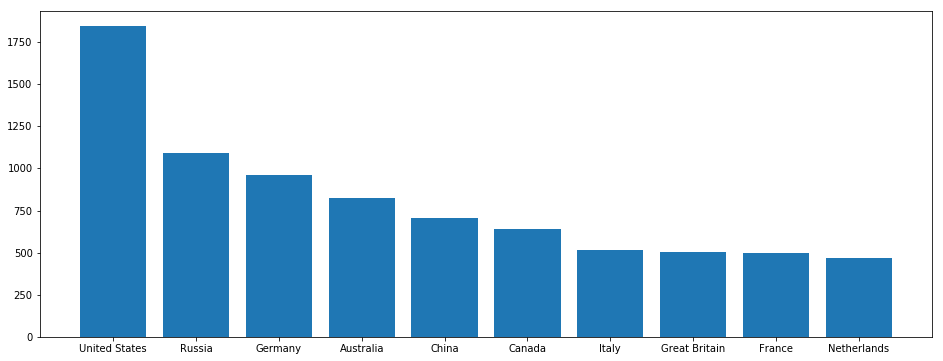

In [10]:
plt.figure(figsize=(16,6))
plt.bar(Top10_Medals.index, Top10_Medals)

In [11]:
Olympics_Summer = Olympics[(Olympics.Season == "Summer") & (Olympics.Year >= 1994)]
Olympics_Summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
159,63,Jos Luis Abajo Gmez,M,30.0,194.0,87.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Men's epee, Individual",Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze


#### Next, we will examine the top-10 Summer and Winter Olympics medal-winning countries.

In [12]:
#Top-10 Summer Olympics medal winners
Top10_Summer_Medals = Olympics_Summer['Team'].value_counts()[:10]
Top10_Summer_Medals

United States    1538
Russia            881
Australia         811
Germany           728
China             637
Great Britain     476
Italy             418
France            417
Netherlands       390
Japan             374
Name: Team, dtype: int64

In [13]:
Olympics_Winter = Olympics[(Olympics.Season == "Winter") & (Olympics.Year >= 1994)]
Olympics_Winter.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze
67,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,Silver
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold


#### The top-10 Winter Olympics medal-winning countries is shown below.

In [14]:
#Top-10 Winter Olympics medal winners
Top10_Winter_Medals = Olympics_Winter['Team'].value_counts()[:10]
Top10_Winter_Medals

Canada           383
United States    307
Germany          231
Finland          222
Russia           208
Norway           191
Sweden           188
Austria          129
Italy            100
Switzerland       93
Name: Team, dtype: int64

Text(0.5,1,'Top-10 Winter Medals - 1994-Present')

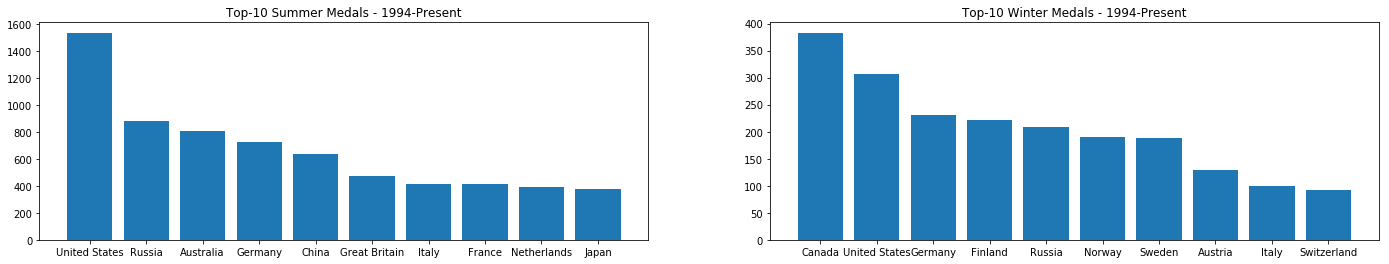

In [15]:
plt.figure(figsize=(24,4))
plt.subplot(1, 2, 1)
plt.bar(Top10_Summer_Medals.index, Top10_Summer_Medals)
plt.title('Top-10 Summer Medals - 1994-Present')
plt.subplot(1, 2, 2)
plt.bar(Top10_Winter_Medals.index, Top10_Winter_Medals)
plt.title('Top-10 Winter Medals - 1994-Present')

#### Now we will examine Team USA medal statistics.  We will look into Summer Olympics and Winter Olympics individually.

In [16]:
USA_Summer = Olympics[(Olympics.NOC =='USA') & (Olympics.Season == 'Summer') & (Olympics.Year >= 1994)]
USA_Summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
186,84,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver
286,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver
311,165,Nia Nicole Abdallah,F,20.0,175.0,56.0,United States,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver
609,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
739,423,Michael Brent Abernathy,M,22.0,182.0,84.0,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold


In [17]:
Top10_USA_Summer = USA_Summer['Sport'].value_counts()[:10]
Top10_USA_Summer

Swimming      396
Athletics     225
Basketball    143
Rowing         82
Football       79
Gymnastics     78
Water Polo     76
Baseball       68
Volleyball     60
Softball       53
Name: Sport, dtype: int64

Text(0.5,1,'Top-10 USA Summer Sports - 1994-Present')

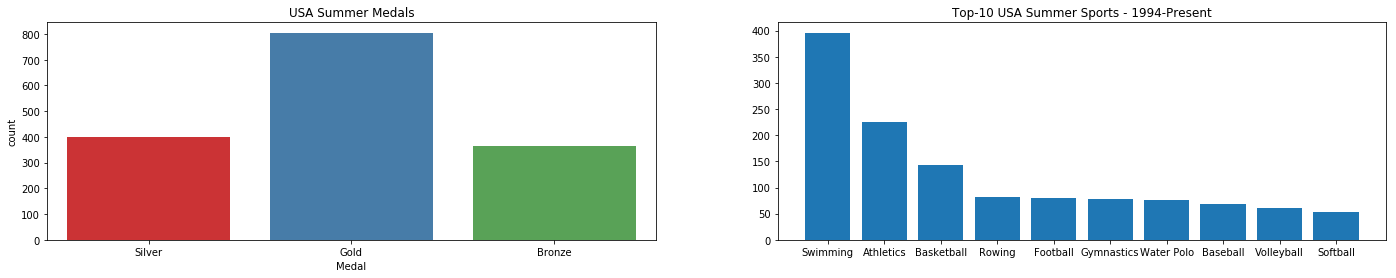

In [18]:
plt.figure(figsize=(24,4))
plt.subplot(1, 2, 1)
sns.countplot(USA_Summer.Medal, palette='Set1')
plt.title('USA Summer Medals')
plt.subplot(1, 2, 2)
plt.bar(Top10_USA_Summer.index, Top10_USA_Summer)
plt.title('Top-10 USA Summer Sports - 1994-Present')

In [19]:
USA_Winter = Olympics[(Olympics.NOC =='USA') & (Olympics.Season == 'Winter') & (Olympics.Year >= 1994)]
USA_Winter.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
278,145,Jeremy Abbott,M,28.0,175.0,70.0,United States,USA,2014 Winter,2014,Winter,Sochi,Figure Skating,Figure Skating Mixed Team,Bronze
2138,1188,"Benjamin Alexandro ""Ben"" Agosto",M,24.0,178.0,75.0,United States-1,USA,2006 Winter,2006,Winter,Torino,Figure Skating,Figure Skating Mixed Ice Dancing,Silver
5568,3150,"Eduardo C. ""Eddy"" Alvarez",M,24.0,175.0,72.0,United States,USA,2014 Winter,2014,Winter,Sochi,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Silver
6214,3491,"Anthony Lewis ""Tony"" Amonte",M,31.0,183.0,91.0,United States,USA,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
6812,3823,Jamie Louise Anderson,F,23.0,160.0,54.0,United States,USA,2014 Winter,2014,Winter,Sochi,Snowboarding,Snowboarding Women's Slopestyle,Gold


In [20]:
Top10_USA_Winter = USA_Winter['Sport'].value_counts()[:10]
Top10_USA_Winter

Ice Hockey                   146
Short Track Speed Skating     37
Bobsleigh                     28
Speed Skating                 27
Snowboarding                  24
Alpine Skiing                 22
Figure Skating                21
Freestyle Skiing              19
Luge                           9
Nordic Combined                7
Name: Sport, dtype: int64

Text(0.5,1,'Top-10 USA Winter Sports - 1994-Present')

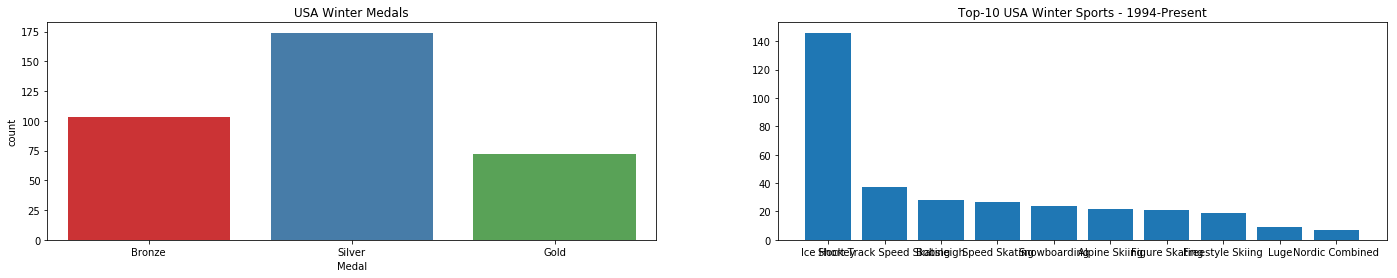

In [21]:
plt.figure(figsize=(24,4))
plt.subplot(1, 2, 1)
sns.countplot(USA_Winter.Medal, palette='Set1')
plt.title('USA Winter Medals')
plt.subplot(1, 2, 2)
plt.bar(Top10_USA_Winter.index, Top10_USA_Winter)
plt.title('Top-10 USA Winter Sports - 1994-Present')

#### China Olympic Statistics.

In [22]:
CHN_Summer = Olympics[(Olympics.NOC =='CHN') & (Olympics.Season == 'Summer') & (Olympics.Year >= 1994)]
CHN_Summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6437,3611,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Softball,Softball Women's Softball,Silver
14077,7597,Bao Yingying,F,24.0,172.0,67.0,China,CHN,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Women's Sabre, Team",Silver
21260,11223,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
33513,17282,Cai Huijue,F,16.0,174.0,63.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze
33523,17289,Cai Tongtong,F,18.0,168.0,48.0,China,CHN,2008 Summer,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Silver


In [23]:
CHN_Winter = Olympics[(Olympics.NOC =='CHN') & (Olympics.Season == 'Winter') & (Olympics.Year >= 1994)]
CHN_Winter.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6433,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver
6435,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze
6436,3610,An Yulong,M,23.0,173.0,70.0,China,CHN,2002 Winter,2002,Winter,Salt Lake City,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze
39244,20181,Chen Dequan,M,18.0,176.0,66.0,China,CHN,2014 Winter,2014,Winter,Sochi,Short Track Speed Skating,"Short Track Speed Skating Men's 5,000 metres R...",Bronze
39341,20240,Chen Lu,F,17.0,162.0,52.0,China,CHN,1994 Winter,1994,Winter,Lillehammer,Figure Skating,Figure Skating Women's Singles,Bronze


Text(0.5,1,'China Winter Medals')

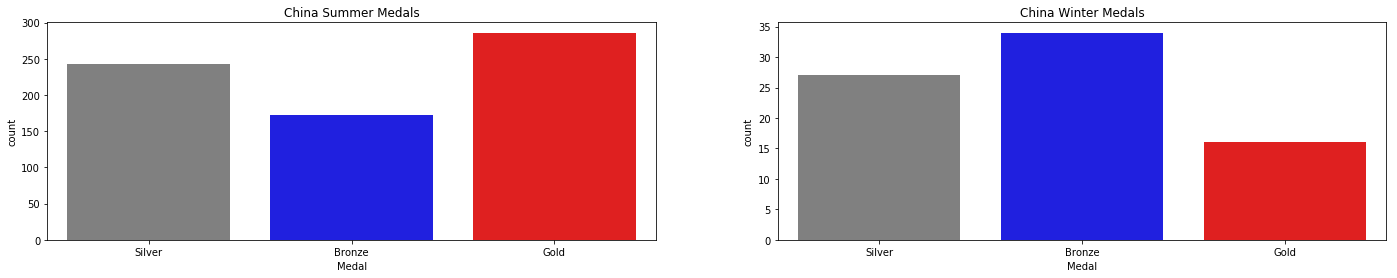

In [24]:
plt.figure(figsize=(24,4))
plt.subplot(1, 2, 1)
sns.countplot(CHN_Summer.Medal, palette=['grey', 'blue', 'red'])
plt.title('China Summer Medals')
plt.subplot(1, 2, 2)
sns.countplot(CHN_Winter.Medal, palette=['grey', 'blue', 'red'])
plt.title('China Winter Medals')

#### Russia Olympic Statistics.

In [25]:
RUS_Summer = Olympics[(Olympics.NOC =='RUS') & (Olympics.Season == 'Summer') & (Olympics.Year >= 1994)]
RUS_Summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
163,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
195,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver
789,455,Denis Mikhaylovich Ablyazin,M,19.0,161.0,62.0,Russia,RUS,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Floor Exercise,Bronze
790,455,Denis Mikhaylovich Ablyazin,M,19.0,161.0,62.0,Russia,RUS,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Silver
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [26]:
RUS_Winter = Olympics[(Olympics.NOC =='RUS') & (Olympics.Season == 'Winter') & (Olympics.Year >= 1994)]
RUS_Winter.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
974,548,Yekaterina Konstantinovna Abramova,F,23.0,167.0,65.0,Russia,RUS,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Women's Team Pursuit (6 laps),Bronze
1962,1085,Maksim Sergeyevich Afinogenov,M,22.0,183.0,88.0,Russia,RUS,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
2934,1639,Albina Khamitovna Akhatova,F,21.0,160.0,55.0,Russia,RUS,1998 Winter,1998,Winter,Nagano,Biathlon,Biathlon Women's 4 x 7.5 kilometres Relay,Silver
2936,1639,Albina Khamitovna Akhatova,F,25.0,160.0,55.0,Russia,RUS,2002 Winter,2002,Winter,Salt Lake City,Biathlon,Biathlon Women's 4 x 7.5 kilometres Relay,Bronze
2938,1639,Albina Khamitovna Akhatova,F,29.0,160.0,55.0,Russia,RUS,2006 Winter,2006,Winter,Torino,Biathlon,Biathlon Women's 10 kilometres Pursuit,Bronze


Text(0.5,1,'Russia Winter Medals')

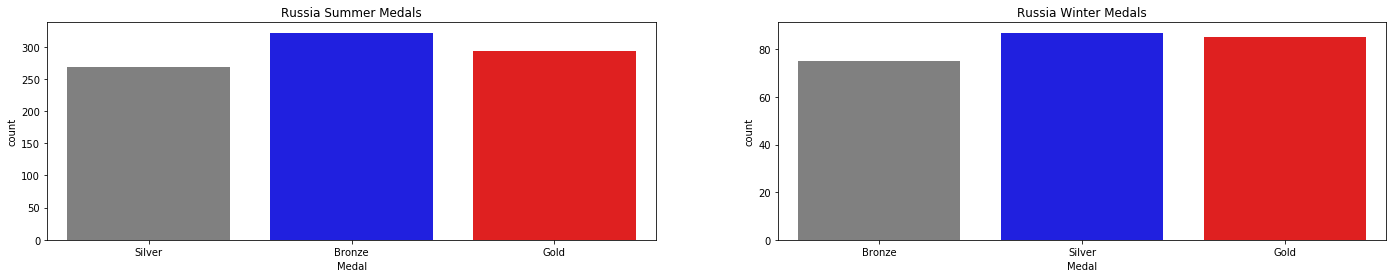

In [27]:
plt.figure(figsize=(24,4))
plt.subplot(1, 2, 1)
sns.countplot(RUS_Summer.Medal, palette=['grey', 'blue', 'red'])
plt.title('Russia Summer Medals')
plt.subplot(1, 2, 2)
sns.countplot(RUS_Winter.Medal, palette=['grey', 'blue', 'red'])
plt.title('Russia Winter Medals')